In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading data
data = pd.read_csv("query_result (2).csv",sep = ",")

In [3]:
data.head()
data.columns

Index([u'nba2015_player_retention2.returned',
       u'nba2015_player_retention2.guid',
       u'nba2015_player_retention2.league_all',
       u'nba2015_player_retention2.comissioner',
       u'nba2015_player_retention2.comanager',
       u'nba2015_player_retention2.assistant_comissioner',
       u'nba2015_player_retention2.has_custom_logo',
       u'nba2015_player_retention2.league_size_max',
       u'nba2015_player_retention2.winning_pct_max',
       u'nba2015_player_retention2.cash_league',
       u'nba2015_player_retention2.ranked_top_half',
       u'nba2015_player_retention2.ranked_top3',
       u'nba2015_player_retention2.leagues_renewed',
       u'nba2015_player_retention2.leagues_auto_renewed',
       u'nba2015_player_retention2.leagues_was_renewed_and_teams_auto_filled',
       u'nba2015_player_retention2.number_of_adds',
       u'nba2015_player_retention2.number_of_roster_changes',
       u'nba2015_player_retention2.number_of_accepted_trades',
       u'nba2015_player_retentio

In [4]:
#Rename the column
newColumns = []
for column in data.columns:
    newColumns.append(column.split(".")[-1])

data.columns = newColumns

In [5]:
# Drop NaN columns
try:
    del data['winning_pct_max']
except:
    print("Already deleted")

data.head()

,returned,guid,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,0,2224DLXMMZ7JSCFYISHYFPFQV4,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,0,0,1
1,0,2224VVHXYS3AL2RR7N5IOHQMII,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,1,0,0
2,1,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,0,1,...,0,0,0,1.0,0,1,0,0,1,0
3,1,222BRXZHDEJKYUPATVLVOAQG6Y,1,0,0,0,0,12,0,1,...,0,0,0,1.0,0,1,0,1,0,0
4,1,222HAPRSN6R4NGWHPFWA2XQGEQ,1,0,0,0,0,13,0,1,...,0,0,0,1.0,0,0,1,1,0,0


In [6]:
#Prepare training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#preprocessing is not necessary for decision tree, random forest, and neural network.
data.ix[:,2:len(data.columns)] = preprocessing.scale(data.ix[:,2:len(data.columns)])

#spliting data
train, test = train_test_split(data, test_size = 0.2)

train_y = train['returned']
train_x = train.ix[:,2:len(train.columns)]

test_y = test['returned']
test_x = test.ix[:,2:len(train.columns)]


/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':
/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [7]:
test_x.head()

,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,ranked_top3,leagues_renewed,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
143783,-0.100131,-0.392561,-0.077065,-0.098371,1.832866,-2.411948,-0.093617,-0.875231,-0.719058,0.633124,...,-0.069103,-0.115354,-0.075548,0.280003,-1.013717,-0.313674,1.215580,0.940774,-0.35357,-0.747384
235326,-0.100131,-0.392561,-0.077065,-0.098371,-0.545594,0.457823,-0.093617,1.142555,1.390708,-0.520571,...,-0.069103,0.096655,-0.075548,-1.457684,0.986469,-0.313674,-0.822653,0.940774,-0.35357,-0.747384
284163,-0.100131,-0.392561,-0.077065,-0.098371,-0.545594,0.457823,-0.093617,1.142555,1.390708,-0.520571,...,-0.069103,0.096655,-0.075548,-1.457684,-1.013717,-0.313674,1.215580,0.940774,-0.35357,-0.747384
183216,-0.100131,-0.392561,-0.077065,-0.098371,-0.545594,-0.498767,-0.093617,-0.875231,-0.719058,-0.520571,...,-0.069103,-0.115354,-0.075548,0.280003,0.986469,-0.313674,-0.822653,0.940774,-0.35357,-0.747384
111880,-0.100131,-0.392561,-0.077065,-0.098371,-0.545594,-1.455357,-0.093617,-0.875231,-0.719058,0.633124,...,-0.069103,-0.115354,-0.075548,0.280003,-1.013717,-0.313674,1.215580,-1.062954,-0.35357,1.338000


In [8]:
#total number of users in 2015
print('totual number of nba fantasy training samples: ',len(data))

#percentage of users returned in 2016
print('percentage of those users returned in 2016',np.sum(data['returned'])/(len(data)+0.0))

('totual number of nba fantasy training samples: ', 312499)
('percentage of those users returned in 2016', 0.4632526824085837)


## Training Part

## 1. Decision Tree

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4,max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf.fit(train_x,train_y)

#initial training and testing scores
print("training score: ",clf.score(train_x,train_y))
print("testing score:", clf.score(test_x,test_y))

('training score: ', 0.76980707922831693)
('testing score:', 0.76982399999999995)


In [10]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,feature_names= \
                             train_x.columns,class_names=["Leave","Returned"])

In [11]:
##See tree 1.jpg for details
clf.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.005851  ,  0.        ,  0.        ,  0.        ,  0.17182194,
        0.        ,  0.        ,  0.05496725,  0.60525296,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.16210685,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [12]:
train.columns[9],train.columns[12],train.columns[13],train.columns[18]

('ranked_top_half',
 'leagues_auto_renewed',
 'leagues_was_renewed_and_teams_auto_filled',
 'private_self_plays')

## 2.Random Forest

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 10,max_depth=5,
                              random_state=0)

In [15]:
forest.fit(train_x,train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [16]:
#initial training and testing scores
print("training score: ",forest.score(train_x,train_y))
print("testing score:", forest.score(test_x,test_y))

('training score: ', 0.73702694810779246)
('testing score:', 0.73561600000000005)


In [17]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature new (0.415551)
2. feature return_player (0.224409)
3. feature leagues_renewed (0.115694)
4. feature ranked_top_half (0.074000)
5. feature return_comissioner (0.038142)
6. feature other_league_inactive (0.033480)
7. feature has_custom_logo (0.021329)
8. feature league_size_max (0.017813)
9. feature private_live_plays (0.013061)
10. feature ranked_top3 (0.011201)
11. feature number_of_comissoners_avg (0.007396)
12. feature number_of_roster_changes (0.005912)
13. feature number_of_adds (0.004771)
14. feature comissioner (0.004082)
15. feature other_league_player (0.003267)
16. feature leagues_auto_renewed (0.002719)
17. feature assistant_comissioner (0.002148)
18. feature public_live_plays (0.001907)
19. feature other_league_comissioner (0.001088)
20. feature number_of_posted_messages (0.000762)
21. feature cash_league (0.000607)
22. feature leagues_was_renewed_and_teams_auto_filled (0.000219)
23. feature private_self_plays (0.000171)
24. feature number_of_acce

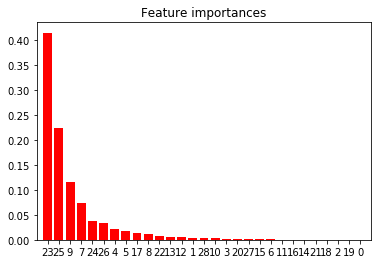

In [18]:
# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train_x.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r")#yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [19]:
#most important five 
print(train_x.columns[indices[:10]])

Index([u'new', u'return_player', u'leagues_renewed', u'ranked_top_half',
       u'return_comissioner', u'other_league_inactive', u'has_custom_logo',
       u'league_size_max', u'private_live_plays', u'ranked_top3'],
      dtype='object')


## 3. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf_l1_LR = LogisticRegression(C=1, penalty='l1', tol=0.001)
clf_l1_LR.fit(train_x,train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [22]:
#initial training and testing scores
print("training score: ",clf_l1_LR.score(train_x,train_y))
print("testing score:", clf_l1_LR.score(test_x,test_y))

('training score: ', 0.77873911495645987)
('testing score:', 0.77695999999999998)


In [23]:
coef_l1_LR = clf_l1_LR.coef_.ravel()
coef_l1_LR

array([ 0.59766819,  0.00323041, -0.07855678,  0.00571177,  0.08121762,
        0.24677495, -0.00642287,  0.03790079,  0.05249533,  0.6979616 ,
        0.07669261, -0.00667463,  0.38435641,  0.5280723 ,  0.22611076,
        0.02539753, -0.0013113 ,  0.17958897, -0.02937651,  0.0600794 ,
       -0.02883048,  0.01487816,  0.15407957,  0.20090526,  0.42085776,
        0.7290974 ,  0.0361539 ,  0.1450652 ,  0.215424  ])

In [24]:
clf_l1_LR.coef_

array([[ 0.59766819,  0.00323041, -0.07855678,  0.00571177,  0.08121762,
         0.24677495, -0.00642287,  0.03790079,  0.05249533,  0.6979616 ,
         0.07669261, -0.00667463,  0.38435641,  0.5280723 ,  0.22611076,
         0.02539753, -0.0013113 ,  0.17958897, -0.02937651,  0.0600794 ,
        -0.02883048,  0.01487816,  0.15407957,  0.20090526,  0.42085776,
         0.7290974 ,  0.0361539 ,  0.1450652 ,  0.215424  ]])

In [25]:
train_x.columns

Index([u'league_all', u'comissioner', u'comanager', u'assistant_comissioner',
       u'has_custom_logo', u'league_size_max', u'cash_league',
       u'ranked_top_half', u'ranked_top3', u'leagues_renewed',
       u'leagues_auto_renewed', u'leagues_was_renewed_and_teams_auto_filled',
       u'number_of_adds', u'number_of_roster_changes',
       u'number_of_accepted_trades', u'number_of_posted_messages',
       u'private_self_plays', u'private_live_plays', u'private_auto_plays',
       u'public_auto_plays', u'public_live_plays', u'cash_entry_fee_max',
       u'number_of_comissoners_avg', u'new', u'return_comissioner',
       u'return_player', u'other_league_inactive', u'other_league_comissioner',
       u'other_league_player'],
      dtype='object')

In [26]:
#[(x,y) for (y,x) in sorted(zip(coef_l1_LR,train_x.columns), key=lambda pair: np.abs(pair[0]), reverse=True)] 

In [27]:
print("C=%.2f" % 1)
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)


C=1.00
Sparsity with L1 penalty: 0.00%


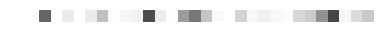

In [28]:
plt.imshow(np.abs(coef_l1_LR.reshape(1, 29)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
plt.axis("off")
plt.show()

In [29]:
#train_x.columns[np.abs(coef_l1_LR) > 0]

Features: new-, leagues_renewed, other_league_inactive-, private_live_plays, has_custom_logo

## Prediction

In [30]:
pre_data = pd.read_csv("prediction_data2.csv",sep=",")

In [31]:
pre_data.head()

,nba2016_player2.guid,nba2016_player2.league_all,nba2016_player2.comissioner,nba2016_player2.comanager,nba2016_player2.assistant_comissioner,nba2016_player2.has_custom_logo,nba2016_player2.league_size_max,nba2016_player2.winning_pct_max,nba2016_player2.cash_league,nba2016_player2.ranked_top_half,...,nba2016_player2.public_auto_plays,nba2016_player2.public_live_plays,nba2016_player2.cash_entry_fee_max,nba2016_player2.number_of_comissoners_avg,nba2016_player2.new,nba2016_player2.return_comissioner,nba2016_player2.return_player,nba2016_player2.other_league_inactive,nba2016_player2.other_league_comissioner,nba2016_player2.other_league_player
0,--,1084,0,1,0,1,20,0.900,1,1,...,13,573,100,0.45583,1,0,0,0,0,1
1,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,0.611,0,1,...,0,0,0,1.00000,1,0,0,0,0,1
2,222A37KWQYXGPFZMJITGRU2MIA,1,0,0,0,0,8,0.526,0,0,...,0,0,0,1.00000,1,0,0,1,0,0
3,222BEAALA4JPKHKGO3OQSMPAEE,2,0,0,0,0,10,0.577,0,1,...,0,0,0,2.00000,1,0,0,1,0,0
4,222BRXZHDEJKYUPATVLVOAQG6Y,2,0,0,0,0,14,0.542,0,1,...,0,0,0,1.00000,1,0,0,1,0,0


In [32]:
preX = pre_data.ix[:,1:len(pre_data.columns)]

/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [33]:
#Rename the column
newColumns = []
for column in preX.columns:
    newColumns.append(column.split(".")[-1])

preX.columns = newColumns
# Drop NaN columns
try:
    del preX['winning_pct_max']
except:
    print("Already deleted")

preX.head()

,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,ranked_top3,leagues_renewed,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,1084,0,1,0,1,20,1,1,1,230,...,13,573,100,0.45583,1,0,0,0,0,1
1,1,0,0,0,1,10,0,1,1,1,...,0,0,0,1.00000,1,0,0,0,0,1
2,1,0,0,0,0,8,0,0,0,0,...,0,0,0,1.00000,1,0,0,1,0,0
3,2,0,0,0,0,10,0,1,1,1,...,0,0,0,2.00000,1,0,0,1,0,0
4,2,0,0,0,0,14,0,1,0,1,...,0,0,0,1.00000,1,0,0,1,0,0


In [35]:
preX = preprocessing.scale(preX)

In [36]:
len(preX)

322579

## QDA

In [37]:
 from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [38]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_x,train_y)

/Users/yizhouz/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [39]:
qda.score(train_x,train_y)

0.63057452229808919

## NN

In [40]:

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.


In [41]:
Y = []
train_y = np.array(train_y)
train_x = np.array(train_x)
for i in range(len(train_y)):
    if train_y[i] == 0:
        Y.append([0,1])
    else:
        Y.append([1,0])

Y = np.array(Y)

In [42]:
dims = train_x.shape[1]
nb_classes = 2

In [43]:
#logistic regression
model = Sequential()
model.add(Dense(2, input_shape=(dims,)))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_x, Y,epochs=3)

Epoch 1/3
249999/249999 [==============================] - 9s - loss: 0.4912 - acc: 0.7748     
Epoch 2/3
249999/249999 [==============================] - 8s - loss: 0.4829 - acc: 0.7788     
Epoch 3/3
249999/249999 [==============================] - 9s - loss: 0.4828 - acc: 0.7786     


In [44]:
np = model.predict(preX)

In [54]:
count = 0
for i in range(len(np)):
    if np[i][0] > 0.5:
        count += 1

#print(count/(len(preX)+0.0))
#45.3%

In [46]:
#Deep Neural Network
model = Sequential()
model.add(Dense(64, input_dim=dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1920      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 14,401
Trainable params: 14,401
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(train_x, train_y,
          epochs=5,
          batch_size=128)

Epoch 1/5
249999/249999 [==============================] - 4s - loss: 0.4852 - acc: 0.7774     
Epoch 2/5
249999/249999 [==============================] - 4s - loss: 0.4754 - acc: 0.7824     
Epoch 3/5
249999/249999 [==============================] - 4s - loss: 0.4734 - acc: 0.7830     
Epoch 4/5
249999/249999 [==============================] - 4s - loss: 0.4727 - acc: 0.7829     
Epoch 5/5
249999/249999 [==============================] - 4s - loss: 0.4722 - acc: 0.7834     


In [52]:
#model.evaluate(np.array(test_x),np.array(test_y))

In [53]:
#(np.sum(model.predict(preX)>0.5)+0.0)/len(preX)
#45.6%

# Plotting part

In [6]:
data.head()

,returned,guid,league_all,comissioner,comanager,assistant_comissioner,has_custom_logo,league_size_max,cash_league,ranked_top_half,...,public_auto_plays,public_live_plays,cash_entry_fee_max,number_of_comissoners_avg,new,return_comissioner,return_player,other_league_inactive,other_league_comissioner,other_league_player
0,0,2224DLXMMZ7JSCFYISHYFPFQV4,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,0,0,1
1,0,2224VVHXYS3AL2RR7N5IOHQMII,1,0,0,0,0,12,0,0,...,0,0,0,1.0,0,0,1,1,0,0
2,1,22264CZFQ2KSRR6FV37JA42HHQ,1,0,0,0,1,10,0,1,...,0,0,0,1.0,0,1,0,0,1,0
3,1,222BRXZHDEJKYUPATVLVOAQG6Y,1,0,0,0,0,12,0,1,...,0,0,0,1.0,0,1,0,1,0,0
4,1,222HAPRSN6R4NGWHPFWA2XQGEQ,1,0,0,0,0,13,0,1,...,0,0,0,1.0,0,0,1,1,0,0


In [7]:
agb = data.groupby(['new','league_all'])['returned']

In [8]:
agb.mean().unstack()

league_all,1,2,3,4,5,6,7,8,9,10,...,24,25,26,32,36,38,42,50,105,3118
new,,,,,,,,,,,,,,,,,,,,,
0,0.659160,0.759986,0.788966,0.813826,0.817873,0.826123,0.817450,0.820378,0.875,0.909091,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
1,0.229079,0.240292,0.242209,0.259050,0.287897,0.279188,0.328169,0.381360,0.600,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [9]:
agb.count().unstack()

league_all,1,2,3,4,5,6,7,8,9,10,...,24,25,26,32,36,38,42,50,105,3118
new,,,,,,,,,,,,,,,,,,,,,
0,104574.0,28665.0,9951.0,4571.0,2059.0,1202.0,745.0,2277.0,24.0,11.0,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0
1,118998.0,23126.0,7605.0,3370.0,1702.0,985.0,710.0,1867.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [10]:
from bokeh.plotting import figure, output_file, show, output_notebook,ColumnDataSource
from bokeh.models import HoverTool,ColorBar, LogColorMapper

In [11]:
sizetable = agb.count().unstack()
colortable = agb.mean().unstack()
sizetable = sizetable.fillna(0)
colortable = colortable.fillna(0)
x = ['new','returned']
y = np.arange(1,11)
colors = [
    ["#%02x%02x%02x" % (int(r), int(s), 150) \
    for r, s in zip(colortable.ix[0,:]*500 % 196, colortable.ix[0,:]*200)],
    ["#%02x%02x%02x" % (int(r), int(s), 150) \
    for r, s in zip(colortable.ix[0,:]*500 % 196, colortable.ix[1,:]*200)]
]
#colors

/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [12]:
colortable.fillna(0)

league_all,1,2,3,4,5,6,7,8,9,10,...,24,25,26,32,36,38,42,50,105,3118
new,,,,,,,,,,,,,,,,,,,,,
0,0.659160,0.759986,0.788966,0.813826,0.817873,0.826123,0.817450,0.820378,0.875,0.909091,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,0.229079,0.240292,0.242209,0.259050,0.287897,0.279188,0.328169,0.381360,0.600,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
hover1 = HoverTool(tooltips = [
    #("User Type","@type"),
    ("leagues #", "@string_y"),
    ("count", "@count%"),
    ("Retention","@ret%")
])


source1 = ColumnDataSource(data = dict(
    x = np.repeat(1,10),
    y = np.arange(0,11),
    string_y = [str(i) if i < 9 else ">8"for i in range(0,11)],
    count = [str(i/10) for i in sizetable.ix[0,:]//(len(data)/1000)],
    ret = [str(i) for i in np.floor(10000*colortable.ix[0,:])/100]
))

hover2 = HoverTool(tooltips = [
    #("User Type","@type"),
    ("leagues #", "@string_y"),
    ("count", "@count%"),
    ("Retention","@ret%")
])

source2 = ColumnDataSource(data = dict(
    x = np.repeat(2,10),
    y = np.arange(0,11),
    string_y = [str(i) if i < 9 else ">8"for i in range(0,11)],
    count = [str(i/10) for i in sizetable.ix[1,:]//(len(data)/1000)],
    ret = [str(i) for i in np.floor(10000*colortable.ix[1,:])/100]
))


TOOLS="resize,pan,wheel_zoom,box_zoom,reset,box_select,save"
p = figure(tools=[hover1,hover2,"pan","save","wheel_zoom"],x_range =["returned","new"], y_range=(-1,11))
#p.circle(np.repeat(1,10),y,radius = (np.log2(sizetable.ix[0,:])/180),
#         fill_alpha = colortable.ix[0,:]**2,
#         fill_color = "#4f1e2e",line_color = "#4f1e2e")

p.circle('x', 'y',radius = (np.log2(sizetable.ix[0,:])**2/1980), 
         fill_alpha = colortable.ix[0,:]**2,fill_color = "#4f1e2e",line_color = "#4f1e2e",
         source=source1)
#p.circle(np.repeat(2,10),y,radius = (np.log2(sizetable.ix[1,:])/180),
#         fill_alpha = colortable.ix[1,:]**2,
#        fill_color = '#4f1e2e',line_color = "#4f1e2e")
p.circle('x', 'y',radius = (np.log2(sizetable.ix[1,:])**2/1980), 
         fill_alpha = colortable.ix[1,:]**2,fill_color = "#4f1e2e",line_color = "#4f1e2e",
         source=source2)   
#Style
p.title.text = "NBA fantasy users churn analysis 2015-2016"
p.title.align = "center"
p.yaxis.axis_label = "Number of renewed leagues played"
p.xaxis.axis_label = "Player type"
p.xgrid.visible = False
p.ygrid.band_fill_alpha = 0.1
p.ygrid.band_fill_color = "beige"


#Color bar
#color_mapper = LogColorMapper(palette="#Blue8", low=1, high=1e7)
#color_bar = ColorBar(color_mapper =  colors[0])
#p.add_layout(color_bar)

output_notebook()
show(p)

/Users/yizhouz/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]
/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/yizhouz/anaconda/lib/python2.7/site-packages/bokeh/plotting/helpers.py:371: UserWarning: HoverTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_t

Loading BokehJS ...

In [37]:
agd = data.groupby(['has_custom_logo'])['returned']
agd.mean()

has_custom_logo
0    0.404410
1    0.660929
Name: returned, dtype: float64

In [38]:
from bokeh.charts import Donut
piedata = pd.Series([0.4044,0.661],index = ["Has custom logo","Does not"])
pie_chart = Donut(piedata)
pie_chart.title.text = "Custom Logo"
show(pie_chart)

In [15]:
his = pd.read_csv("nba_user_history.csv")

In [16]:
his.head()

,GAME NAME,game id,Total number of users,Number of comissisoners,Percentage of comissoners,Users return from last year,User returning rate,Commissioner continue from last year,commissioner continuing rate,Commissioner return from last year,Commissioner returning rate,Player return rom last year,Player returning rate,Player to commissioner,Number of cash users,Avg money spent by each user
0,NBA 2010,249,699831,89248,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NBA 2011,265,776118,101752,0.131,355921.0,0.509,36635.0,0.360,53255.0,0.597,302666.0,0.496,18891.0,0.0,0.0
2,NBA 2012,304,871293,123418,0.142,386082.0,0.497,40914.0,0.332,59027.0,0.580,327055.0,0.485,17564.0,0.0,0.0
3,NBA 2013,322,841293,125293,0.149,391295.0,0.449,42485.0,0.339,60111.0,0.487,331184.0,0.443,19406.0,0.0,0.0
4,NBA 2014,342,865890,122878,0.142,388945.0,0.462,43629.0,0.355,61124.0,0.488,327821.0,0.458,17535.0,0.0,0.0


AttributeError: 'numpy.ndarray' object has no attribute 'arange'